### This notebook is used to examine sea ice concentration and extent globally, but mostly in the arctic and antarctic regions. The dataset used to look a this information spans from 
### September 1981 to 2023, and is accompanied by another dataset that can be used to spatially weigh the ice concentration data.
##### Resources in this notebook are largely supplied by Dr. Beadling, and assembled by Colin Krzystek)

![image](https://www.ucdavis.edu/sites/default/files/media/images/polar-bear-climate-change-deniers-uc-davis-2.jpg)
https://www.ucdavis.edu/sites/default/files/media/images/polar-bear-climate-change-deniers-uc-davis-2.jpg

In [11]:
### Note new packages that we are importing!!
from cartopy import crs as ccrs, feature as cfeature        ## for plotting geo spatial data
import cmocean                    ## for nice colormaps.
import matplotlib.path as mpath   ## needed for nice looking polar projections.
import momlevel as ml             ## for computing annual mean and seasonal cycle.
import matplotlib.pyplot as plt
import zarr
import xarray as xr
import numpy as np

In [12]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6

### Load in our observations of Sea Ice Concentration from the NOAA OI SST V2 High Resolution Dataset from September 1981 to September 2023 on a 1/4 - degree grid. Here we load in the dataset in as a Zarr store instead of a netcdf file since the dataset is high-resolution (you do not need to know the details of this now). To load in Zarr format data, we use Xarray's `xr.open_zarr()` method instead of `xr.open_dataset`.

### We also load in a file that contains the pre-computed grid cell area for our dataset:



In [13]:
seaice_observations = xr.open_zarr('/home/ees_student/Krzystek_Unit5/data/seaice_concentration_data',use_cftime=True)
seaice_gridcell_area = xr.open_dataset('/home/ees_student/Krzystek_Unit5/data/cell_area_seaiceconc.nc')

### Function for creating nice looking NorthPolarStereo projections:

In [14]:
def North_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.NorthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap,levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

### Function for creating nice looking SouthPolarStereo projections:

In [15]:
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

### Create a global map using a nice - projection of the time-averaged (Sept 1981 to Sept 2022, full dataset) sea ice concentration. 
* #### Add coastlines to your plot to distinguish land using `ax.coastlines()`.
* #### Make sure to choose appropriate vmin & vmax values for your color bar.
* #### Choose a global projection that is reasonable to display the data .....
  * Explore the Robinson, EckertIV, and other projections.
* #### Choose an appropriate color map to display the data.
  * cmocean maps here: https://matplotlib.org/cmocean/ (hint: what is the data you are displaying??)

### For a full list of projections available via Cartopy please use this reference: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#platecarree

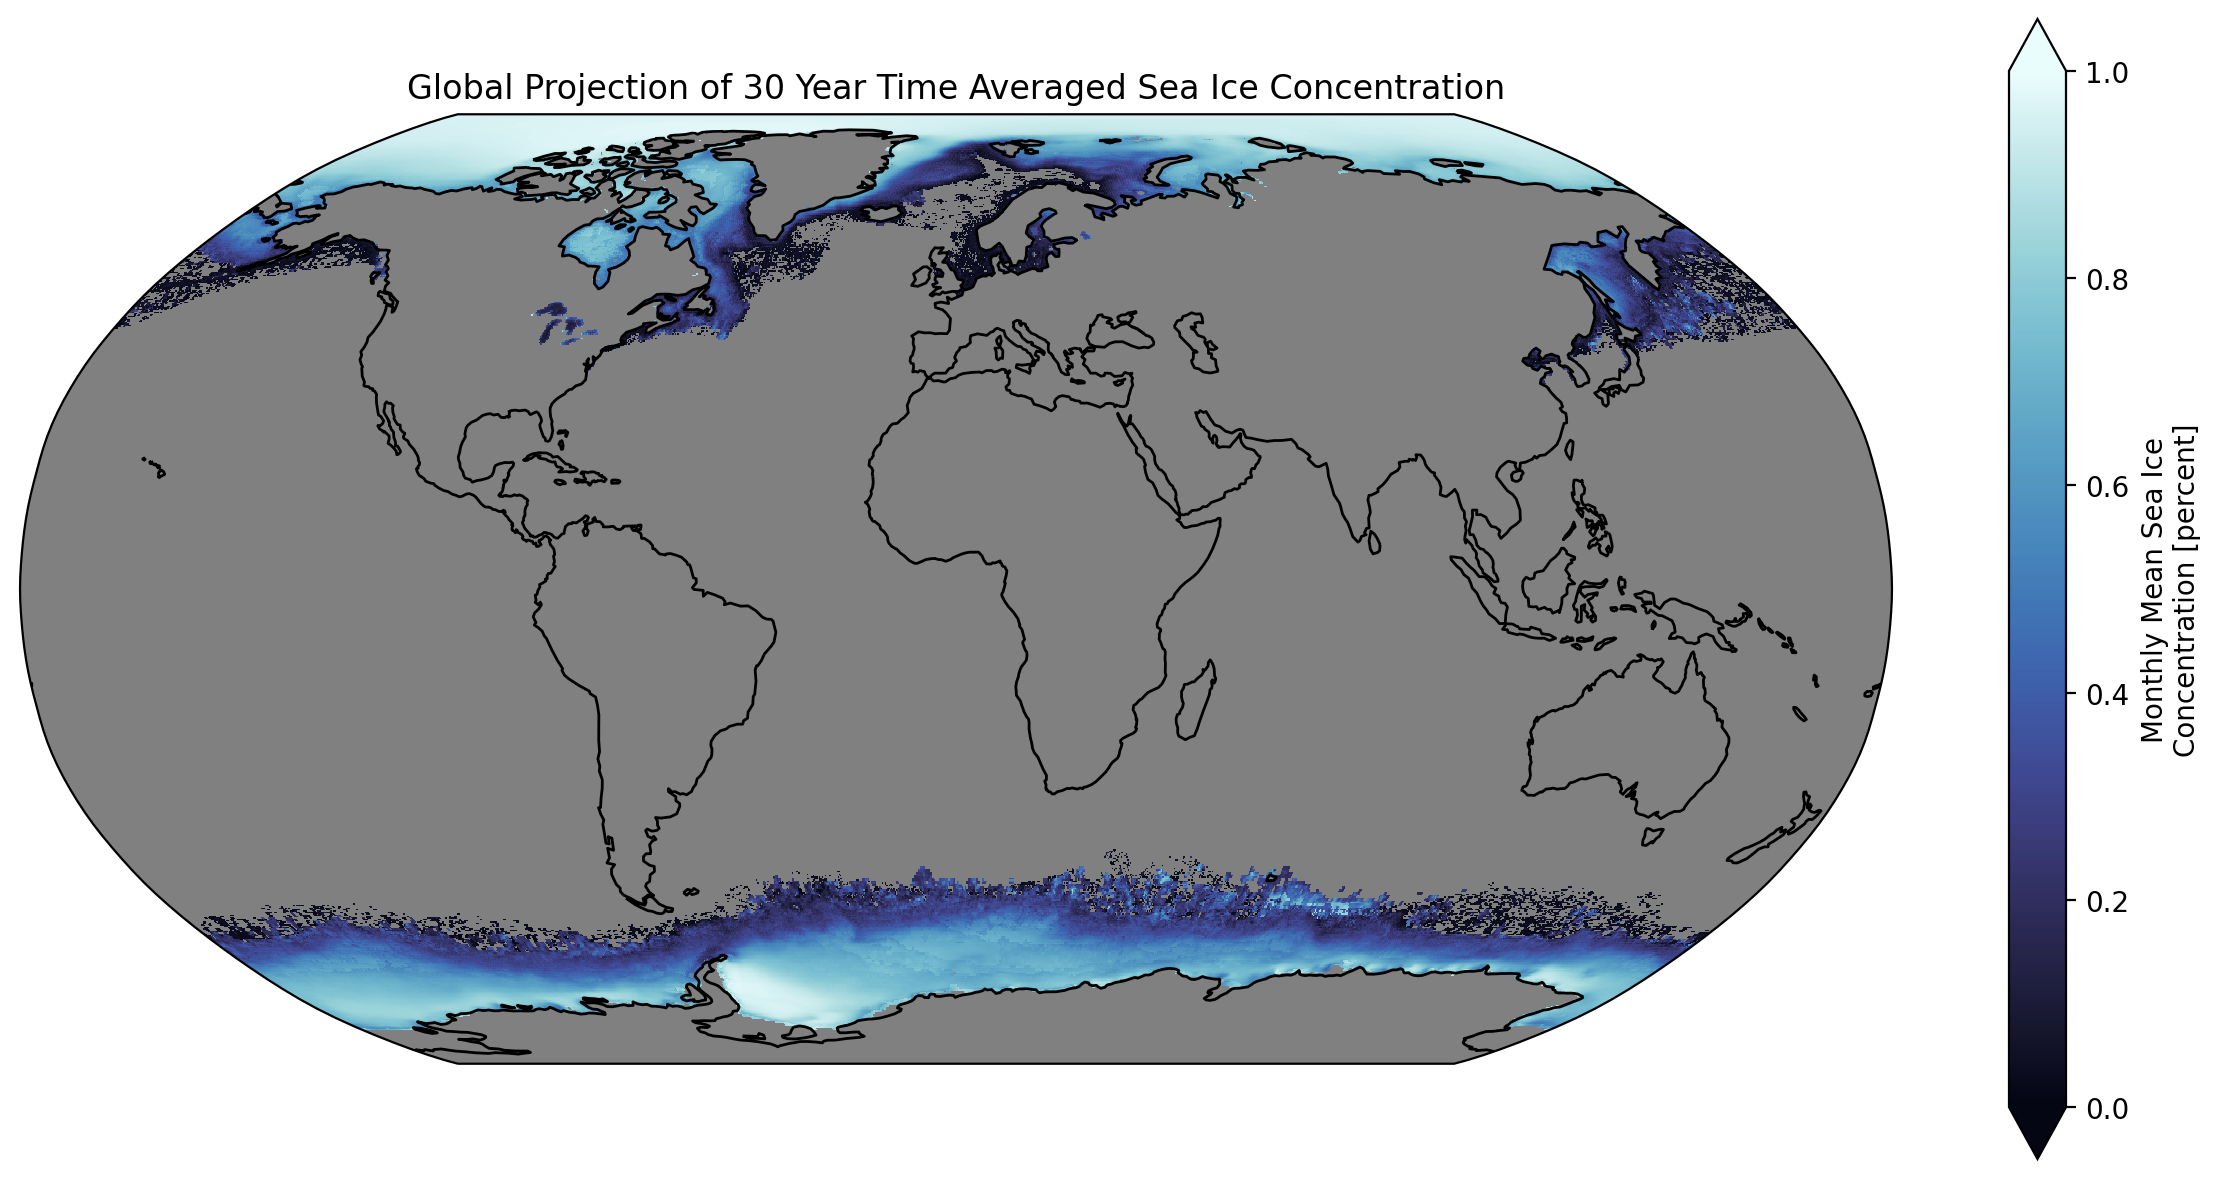

In [16]:
icec = seaice_observations.icec  #Selecting the icec data
icec_time = ml.util.annual_cycle(icec,tcoord='time') #taking the mean over each month
icec_time_average = ml.util.annual_average(icec_time,tcoord='time').squeeze() #taking the yearly average

import cartopy.crs as ccrs  #importing the cartopy package to use for figures
subplot_kws=dict(projection=ccrs.Robinson(),  #earth Robinson projection, colored grey
                 facecolor='grey')

fig, ax = plt.subplots( subplot_kw = subplot_kws)  #plotting the time averaged sea ice concentration

icec_time_average.plot( ax=ax,
                        cmap=cmocean.cm.ice,
                        vmin=0,vmax=1, extend='both',
                        transform= ccrs.PlateCarree())
plt.tight_layout()
ax.set_title('Global Projection of 30 Year Time Averaged Sea Ice Concentration')
ax.coastlines() #adds coastlines to show outlines of continents

**Figure 1:** Global projection of the time-averaged (Sept 1981 to Sept 2022) sea ice concentration, using the sea ice concentration dataset.

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Northern Hemisphere wintertime-averaged Arctic sea ice averaged over the full time period of observations:

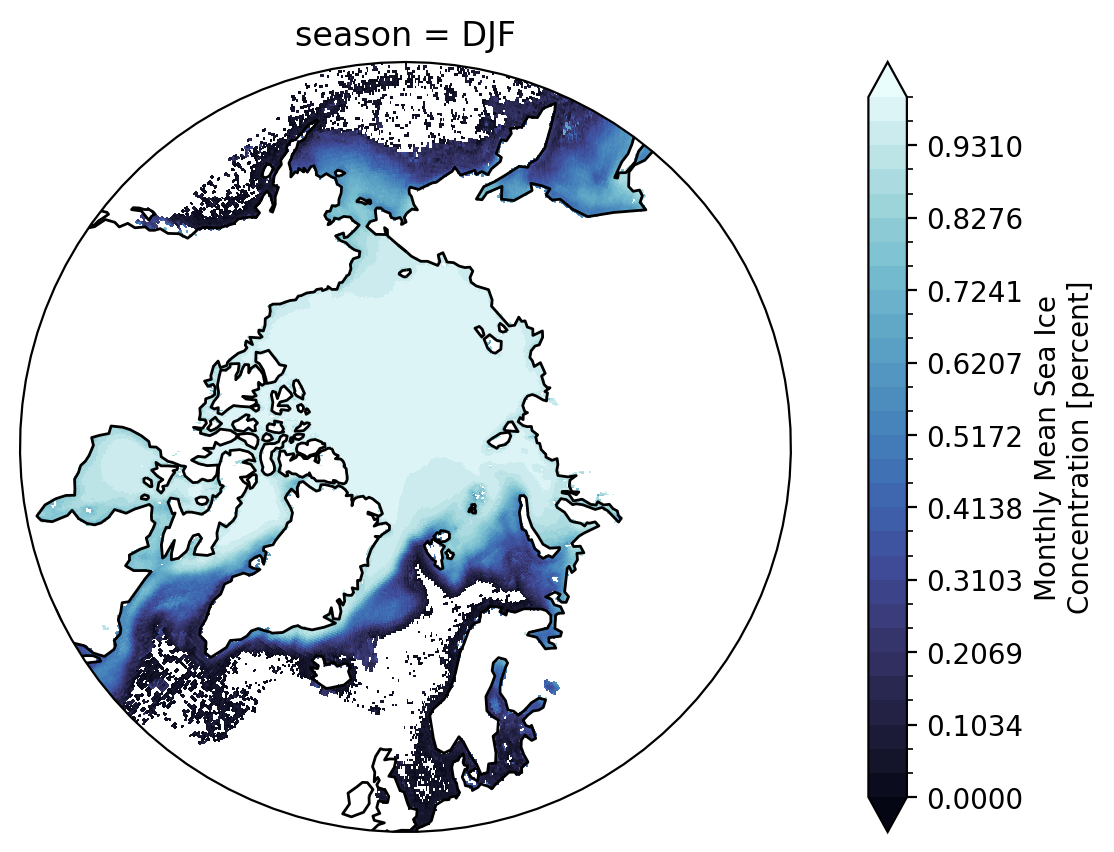

In [17]:
icec_seasons = icec.groupby('time.season').mean(dim='time')  #taking the means over each season
DJF = icec_seasons.sel(season='DJF')  #choosing the Winter season
JJA = icec_seasons.sel(season='JJA') #choosing the Summer season

North_Polar(DJF,0,1,cmocean.cm.ice)  #Using the North Pole function created at the top, Plotting the Winter average in the arctic for sea ice

**Figure 2:** North Pole projection of the time-averaged (Sept 1981 to Sept 2022) sea ice concentration in Winter, using the sea ice concentration dataset.

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Northern Hemisphere summertime-averaged Arctic sea ice averaged over the full time period of observations:

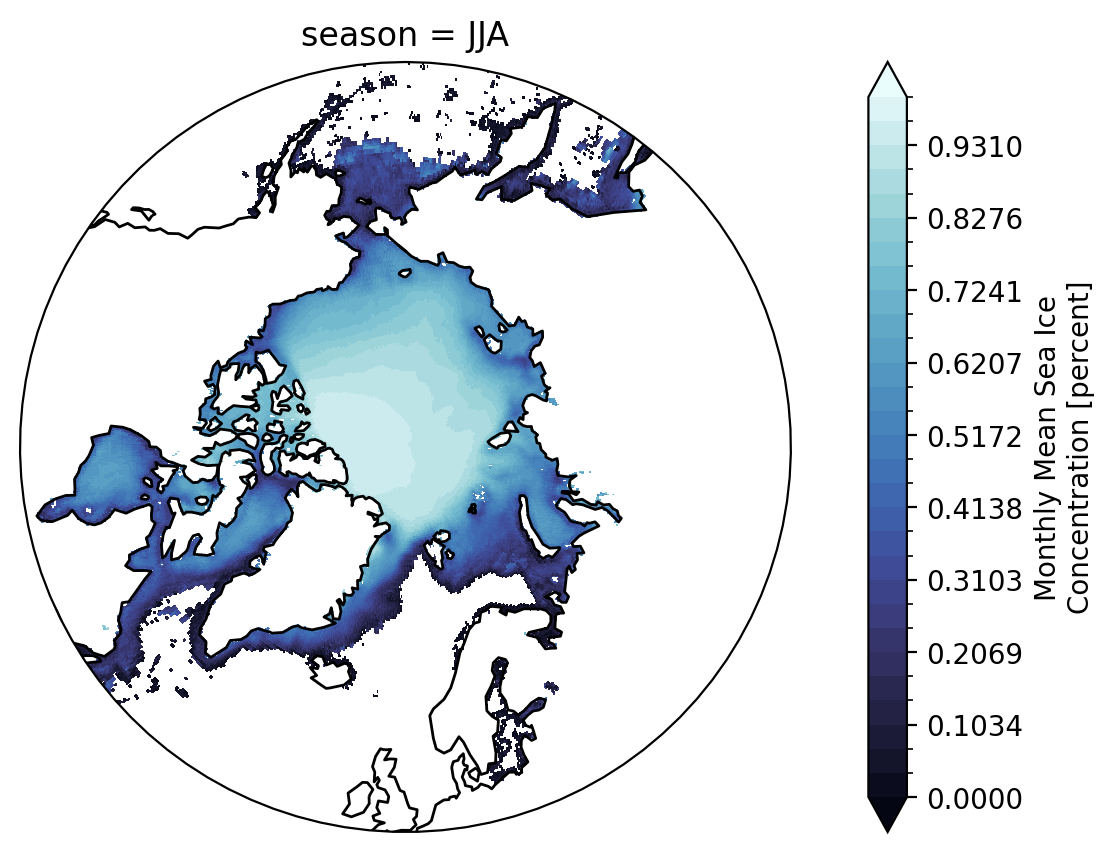

In [18]:
North_Polar(JJA,0,1,cmocean.cm.ice)  #Using the North Pole function created at the top, Plotting the Summer average in the arctic for sea ice

**Figure 3:** North Pole projection of the time-averaged (Sept 1981 to Sept 2022) sea ice concentration in Summer, using the sea ice concentration dataset.

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Southern Hemisphere wintertime-averaged Arctic sea ice averaged over the full time period of observations:

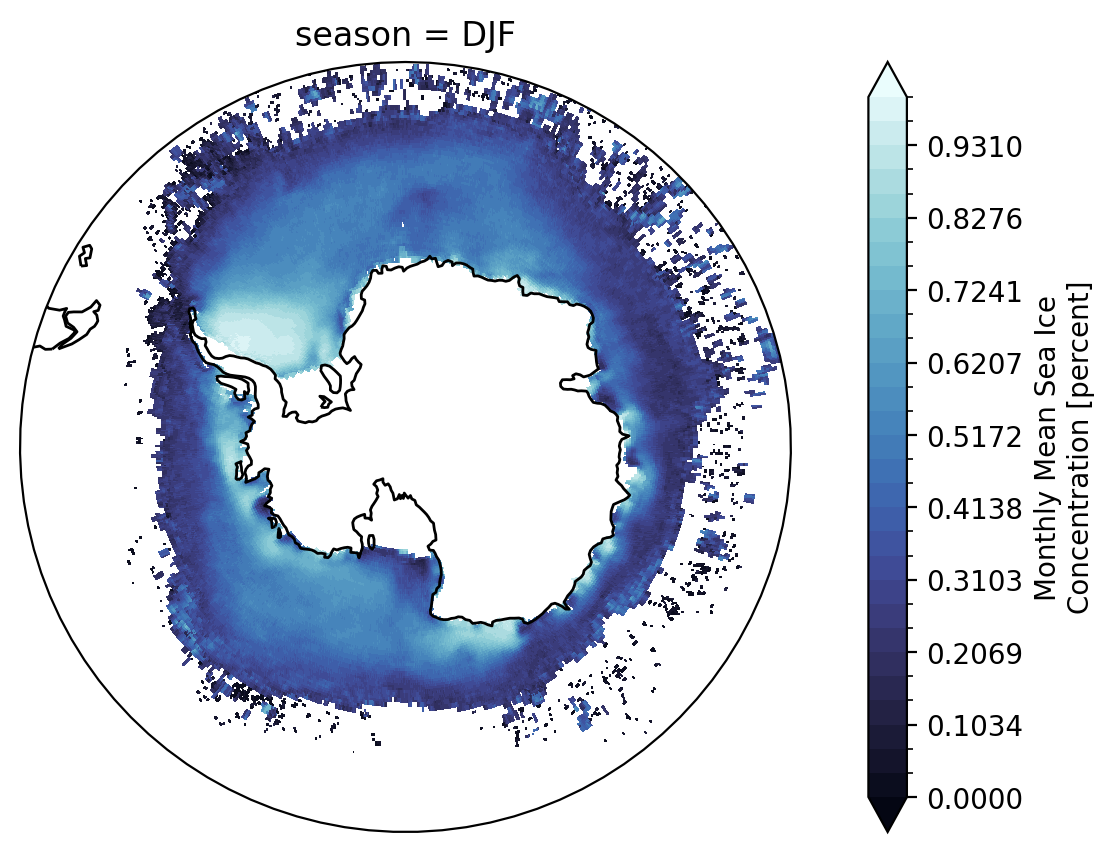

In [19]:
South_Polar(DJF,0,1,cmocean.cm.ice) #Using the South Pole function created at the top, Plotting the Winter average in the antarctic for sea ice

**Figure 4:** South Pole projection of the time-averaged (Sept 1981 to Sept 2022) sea ice concentration in Winter, using the sea ice concentration dataset.

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Southern Hemisphere summertime-averaged Arctic sea ice averaged over the full time period of observations:

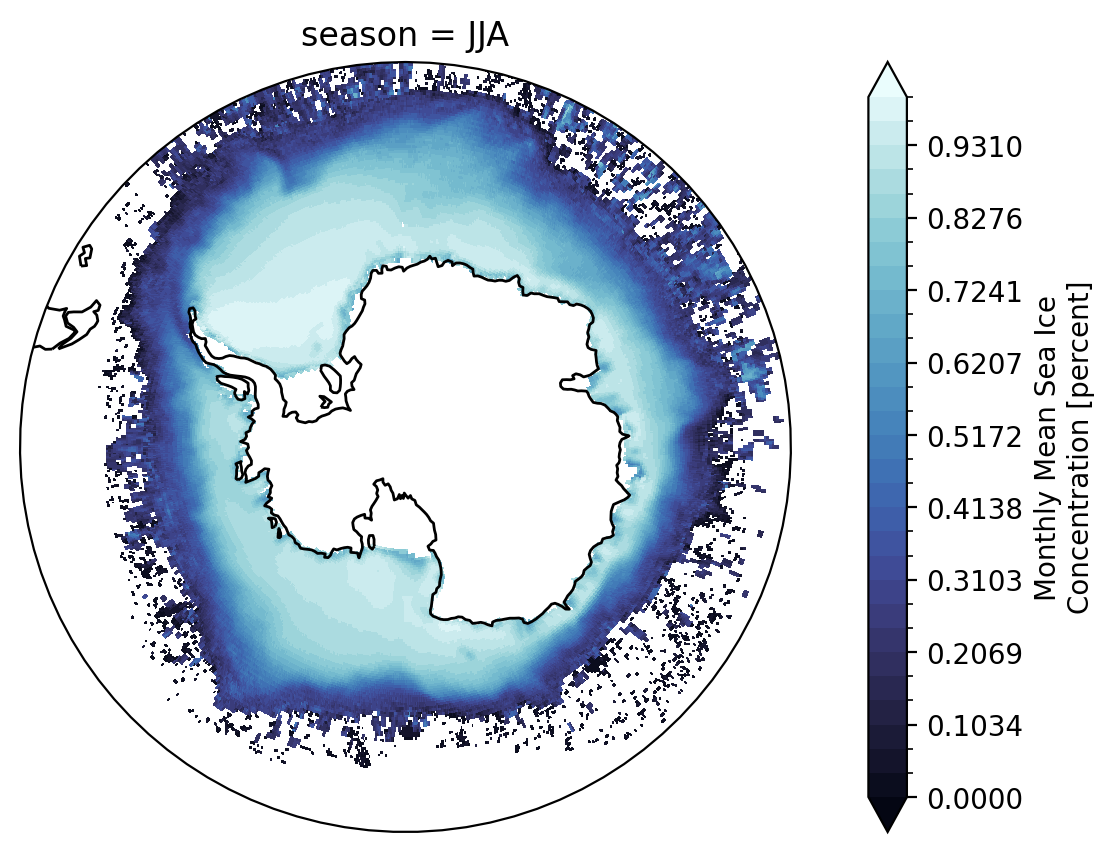

In [20]:
South_Polar(JJA,0,1,cmocean.cm.ice)  #Using the South Pole function created at the top, Plotting the Summer average in the antarctic for sea ice

**Figure 5:** South Pole projection of the time-averaged (Sept 1981 to Sept 2022) sea ice concentration in Summer, using the sea ice concentration dataset.

## Sea Ice Extent Analysis

#### Total Sea Ice Extent (SIE) in million km^2 is a metric that climate scientists commonly use to monitor sea ice. SIE is computed as:
* The __sum of__ the (fractional sea ice coverage (concentration) * the grid cell area covered by sea ice) = m^2
* Convert m^2 to km^2

#### You have loaded in two datasets that will allow you to do this calculation and reproduce the following plot of the seasonal cycle for Arctic SIE. Produce a plot of Arctic SIE: 
* With the 1982 to 2010 time-average as a thick dashed line
* Use Xarray's `.std()` method to compute the standard deviation (this is just like you did for `.mean(dim='time')`, except your method is now `.std(dim='time')` and place two thin lines on your plot that indicate the 1982 to 2010 time-average + 2 standard deviations and the 1982 to 2010 time-average + 2 standard deviations.
* A thick red line for the annual-cycle of SIE for 2012
* Lines for 2020 and 2021.
* Your x-axis should be in actual months, not integers.

*** Hints: 
* This will involve some slicing in space and time!
* Use Xarray's `.groupby('time.month').mean(dim='time')` method to take your 1982 to 2010 data to an annual / seasonal cycle!
* You can also use .std(dim='time') .....
* Make sure you are checking your DataArrays that you are calculating to make sure you know what you are plotting / the regions / dimensions / etc .... when in doubt, print your array!
* You do not have to do this for this assignment ..... but you can also using ax.fill_between()... specifying your x and y axes just like you did using a Pandas array in our Unit3 module and shade your standard deviations about your mean ....


![](https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147306/arctic_nsidc_2020259_plot.png)

In [21]:
icec=seaice_observations.icec  #selecting the icec data
month_length = icec.time.dt.days_in_month  #creating a set of months weights to give each month's values the proper weighting.
month_weights = month_length.groupby('time.year') / month_length.groupby('time.year').sum()

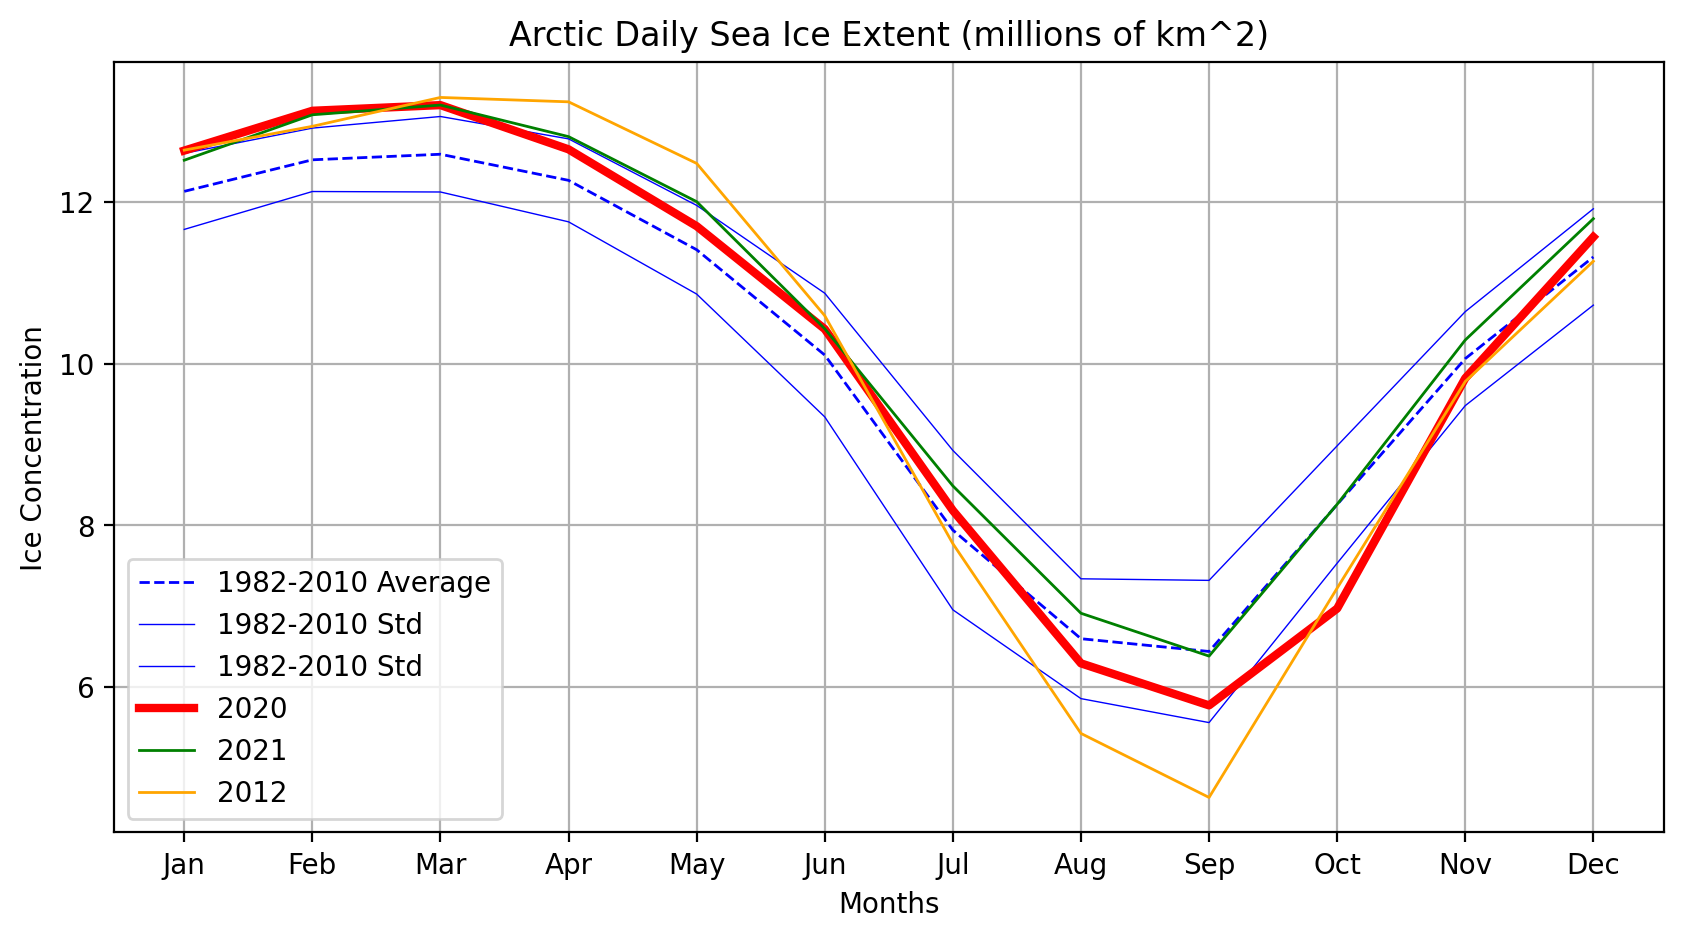

In [22]:
grid = ((seaice_gridcell_area.cell_area*seaice_observations.icec).sel(lat=slice(50,90)).mean(dim=['lat','lon']))/10000000  #Using the grid cell area to spatially weight the icec data, then choosing the arctic, and lastly averaging together all the lat long data.
grid_arctic = grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').mean(dim='time') #averageing over the 1982-2010 range
grid_arctic_std = grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').std(dim='time') #std dev over the 1982-2010 range
grid_std_plot1 = grid_arctic + grid_arctic_std + grid_arctic_std  #creating the std dev range for plotting
grid_std_plot2 = grid_arctic - grid_arctic_std - grid_arctic_std

grid_2020 = grid.sel(time=slice('2020-01-01','2020-12-01')).groupby('time.month').mean(dim='time')  #2020 curve
grid_2021 = grid.sel(time=slice('2021-01-01','2021-12-01')).groupby('time.month').mean(dim='time')  #2021 curve
grid_2012 = grid.sel(time=slice('2012-01-01','2012-12-01')).groupby('time.month').mean(dim='time')  #2012 curve

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']   #list for month names
grid_arctic_months = grid_arctic.drop(labels='month').assign_coords({'month':months})  #replacing month numbers with month names
grid_std_plot1_months = grid_std_plot1.drop(labels='month').assign_coords({'month':months})  #replacing month numbers with month names
grid_std_plot2_months = grid_std_plot2.drop(labels='month').assign_coords({'month':months})  #replacing month numbers with month names
grid_2020_months = grid_2020.drop(labels='month').assign_coords({'month':months})  #replacing month numbers with month names
grid_2021_months = grid_2021.drop(labels='month').assign_coords({'month':months})  #replacing month numbers with month names
grid_2012_months = grid_2012.drop(labels='month').assign_coords({'month':months})  #replacing month numbers with month names


fig, ax = plt.subplots(figsize = (10, 5))  #creating plot for 1982-2010 range
grid_arctic_months.plot(ax=ax,
        linewidth=1,label='1982-2010 Average',
        color='blue',linestyle='--')

grid_std_plot1_months.plot(ax=ax,  #creating plot for upper bound for std dev
        linewidth=0.5,label='1982-2010 Std',
        color='blue')

grid_std_plot2_months.plot(ax=ax,  #creating plot for lower bound for std dev
        linewidth=0.5,label='1982-2010 Std',
        color='blue')

grid_2020_months.plot(ax=ax,   #creating plot for 2020 curve
        linewidth=3,label='2020',
        color='red')
grid_2021_months.plot(ax=ax,  #creating plot for 2021 curve
        linewidth=1,label='2021',
        color='green')
grid_2012_months.plot(ax=ax,  #creating plot for 2012 curve
        linewidth=1,label='2012',
        color='orange')

ax.set_title('Arctic Daily Sea Ice Extent (millions of km^2)')  #set the title for the plot

## add axes labes:
ax.set_ylabel('Ice Concentration')
ax.set_xlabel('Months')

ax.grid(linestyle='-')  #made grid lines
ax.legend()  #show legend

**Figure 6:** Arctic total Sea Ice Extent (SIE) in million km^2 for various different time averages. The dashed blue line is a 30 year average SIE with it's standard deviation in solid blue above and below it. The thick red line is the 2020 year average, the green line is the 2021 year average, and the yellow line is the 2012 year average, which had the lowest SIE levels recorded so far. This figure is created using the sea ice extent data set, and spatially weighted using the sea ice gridcell data set.

## Repeat the above excercise but for Antarctic Sea Ice ... 

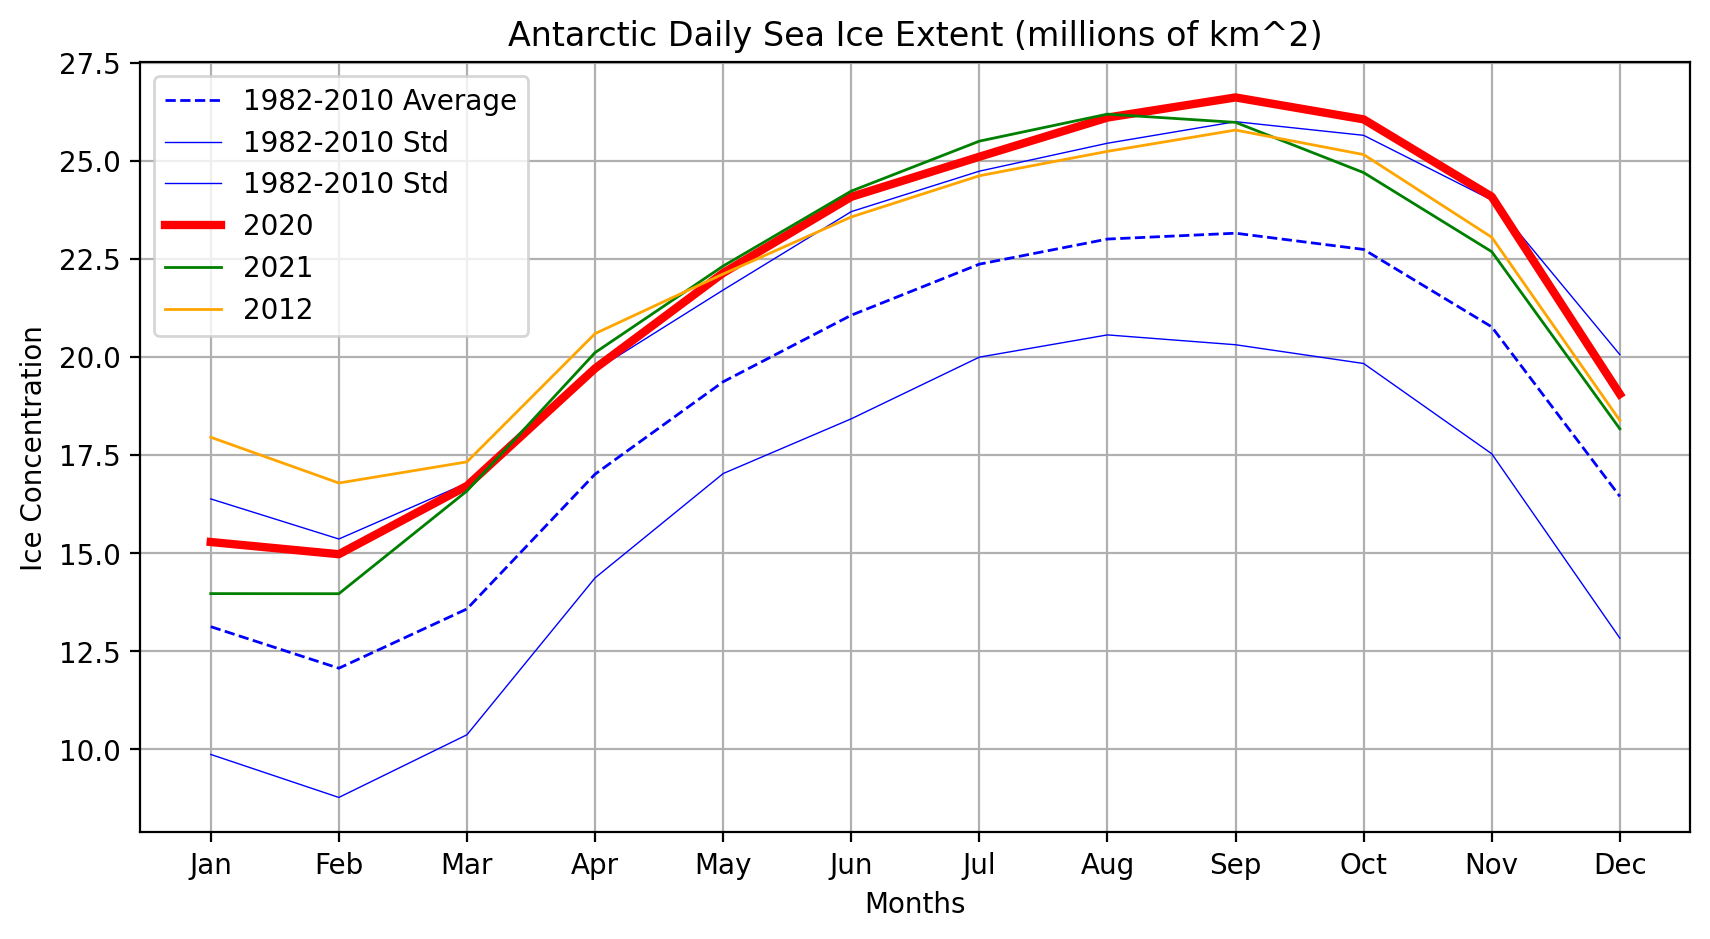

In [25]:
grid = ((seaice_gridcell_area.cell_area*seaice_observations.icec).sel(lat=slice(-90,-50)).mean(dim=['lat','lon']))/10000000  #all same as above
grid_Ant = grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').mean(dim='time')
grid_Ant_std = grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').std(dim='time')
grid_Ant_std_plot1 = grid_Ant + grid_Ant_std + grid_Ant_std
grid_Ant_std_plot2 = grid_Ant - grid_Ant_std - grid_Ant_std


grid_Ant_2020 = grid.sel(time=slice('2020-01-01','2020-12-01')).groupby('time.month').mean(dim='time')
grid_Ant_2021 = grid.sel(time=slice('2021-01-01','2021-12-01')).groupby('time.month').mean(dim='time')
grid_Ant_2012 = grid.sel(time=slice('2012-01-01','2012-12-01')).groupby('time.month').mean(dim='time')

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
grid_Ant_months = grid_Ant.drop(labels='month').assign_coords({'month':months})
grid_Ant_std_plot1_months = grid_Ant_std_plot1.drop(labels='month').assign_coords({'month':months})
grid_Ant_std_plot2_months = grid_Ant_std_plot2.drop(labels='month').assign_coords({'month':months})
grid_Ant_2020_months = grid_Ant_2020.drop(labels='month').assign_coords({'month':months})
grid_Ant_2021_months = grid_Ant_2021.drop(labels='month').assign_coords({'month':months})
grid_Ant_2012_months = grid_Ant_2012.drop(labels='month').assign_coords({'month':months})


fig, ax = plt.subplots(figsize = (10, 5))
grid_Ant_months.plot(ax=ax,
        linewidth=1,label='1982-2010 Average',
        color='blue',linestyle='--')

grid_Ant_std_plot1_months.plot(ax=ax,
        linewidth=0.5,label='1982-2010 Std',
        color='blue')

grid_Ant_std_plot2_months.plot(ax=ax,
        linewidth=0.5,label='1982-2010 Std',
        color='blue')

grid_Ant_2020_months.plot(ax=ax,
        linewidth=3,label='2020',
        color='red')
grid_Ant_2021_months.plot(ax=ax,
        linewidth=1,label='2021',
        color='green')
grid_Ant_2012_months.plot(ax=ax,
        linewidth=1,label='2012',
        color='orange')

ax.set_title('Antarctic Daily Sea Ice Extent (millions of km^2)')

## add axes labes:
ax.set_ylabel('Ice Concentration')
ax.set_xlabel('Months')

ax.grid(linestyle='-')
ax.legend()

**Figure 7:** Antarctic total Sea Ice Extent (SIE) in million km^2 for various different time averages. The dashed blue line is a 30 year average SIE with it's standard deviation in solid blue above and below it. The thick red line is the 2020 year average, the green line is the 2021 year average, and the yellow line is the 2012 year average, which had the lowest SIE levels recorded so far. This figure is created using the sea ice extent data set, and spatially weighted using the sea ice gridcell data set.

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Antarctic sea ice extent is at its maximum ...

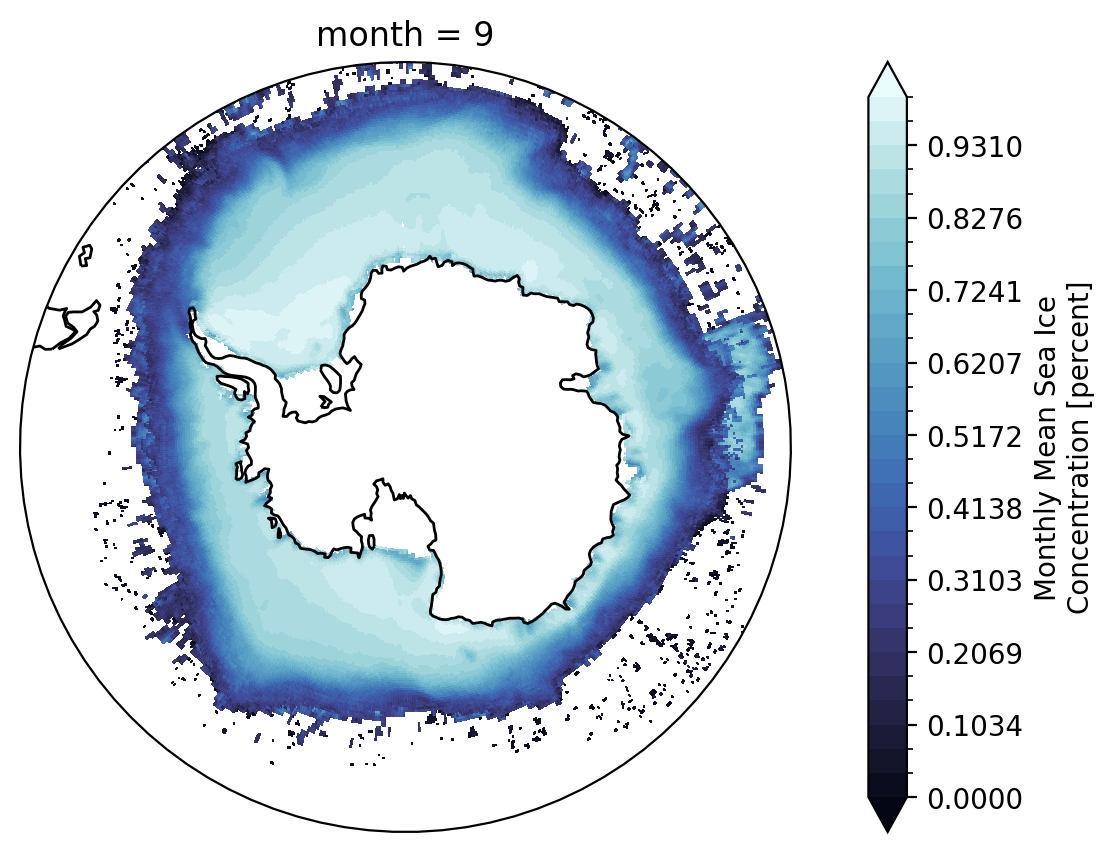

In [180]:
Ant_max = icec.groupby('time.month').mean(dim='time').sel(month=9)  #creating the data for the September's 1982-2010 average
South_Polar(Ant_max,0,1,cmocean.cm.ice)  #plotting usign the South pole function created above

**Figure 8:** North Pole projection of the time-averaged (Sept 1981 to Sept 2022) sea ice concentration in the month of September, which is historically the month where SIE is at its maximum. This project is created using the sea ice concentration dataset.

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Antarctic sea ice extent is at its minimum ...

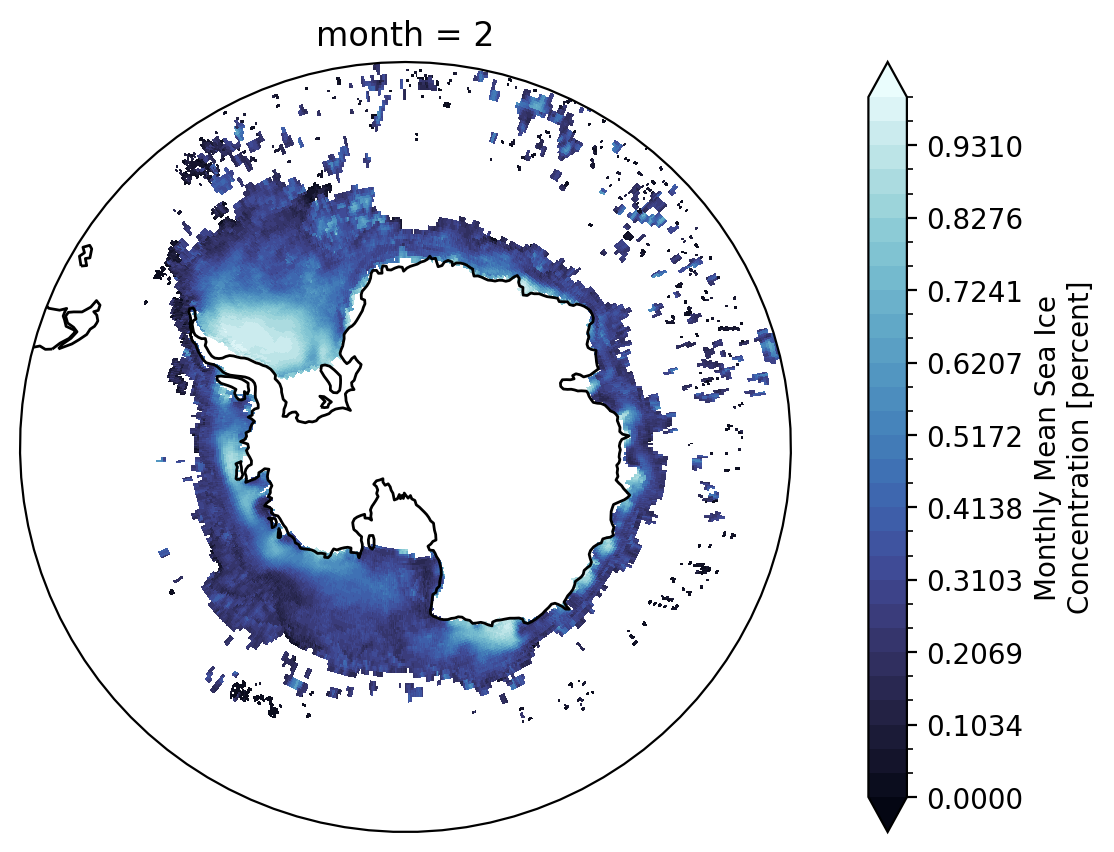

In [185]:
Ant_min = icec.groupby('time.month').mean(dim='time').sel(month=2  ##creating the data for the decembers's 1982-2010 average
South_Polar(Ant_max,0,1,cmocean.cm.ice) #plotting usign the South pole function created above

**Figure 9:** North Pole projection of the time-averaged (Sept 1981 to Sept 2022) sea ice concentration in the month of February, which is historically the month where SIE is at its minimum. This project is created using the sea ice concentration dataset.

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Arctic sea ice extent is at its minimum ...

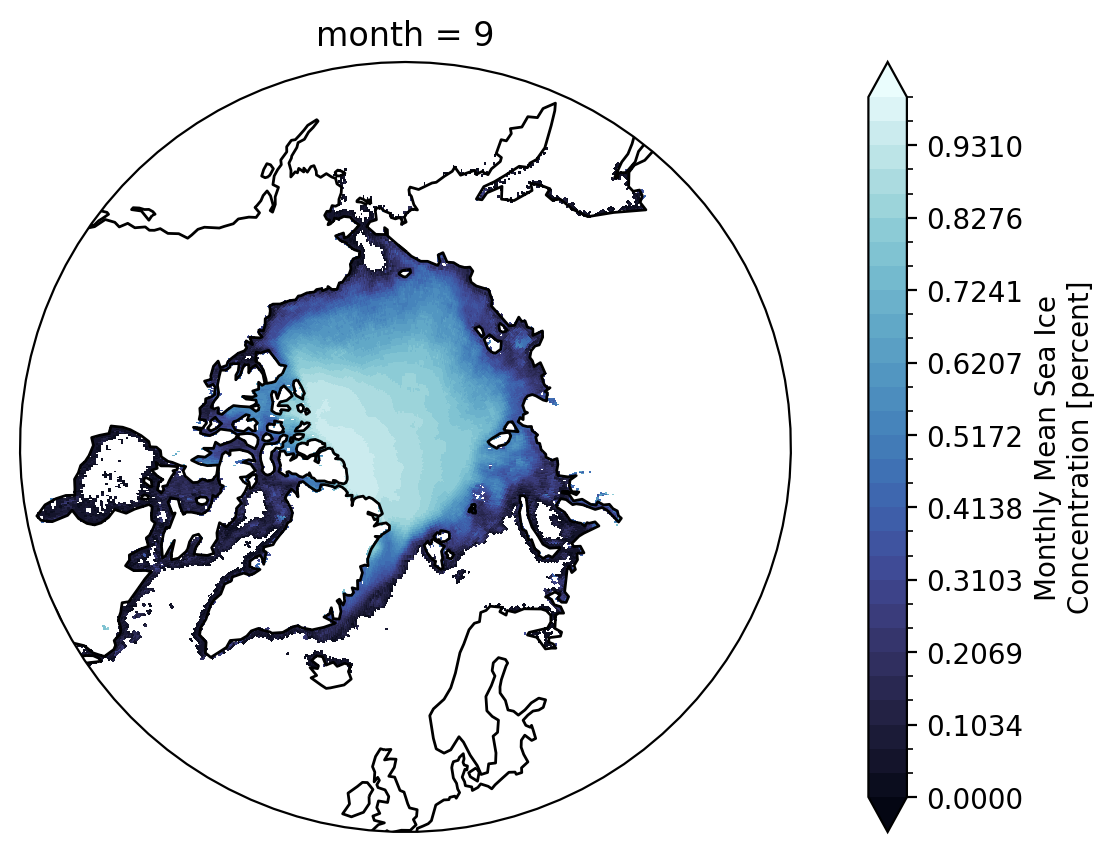

In [183]:
Arctic_min = icec.groupby('time.month').mean(dim='time').sel(month=9)   ##creating the data for the September's 1982-2010 average
North_Polar(Arctic_min,0,1,cmocean.cm.ice) #plotting usign the North pole function created above

**Figure 10:** South Pole projection of the time-averaged (Sept 1981 to Sept 2022) sea ice concentration in the month of September, which is historically the month where SIE is at its maximum. This project is created using the sea ice concentration dataset.

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Arctic sea ice extent is at its maximum ...

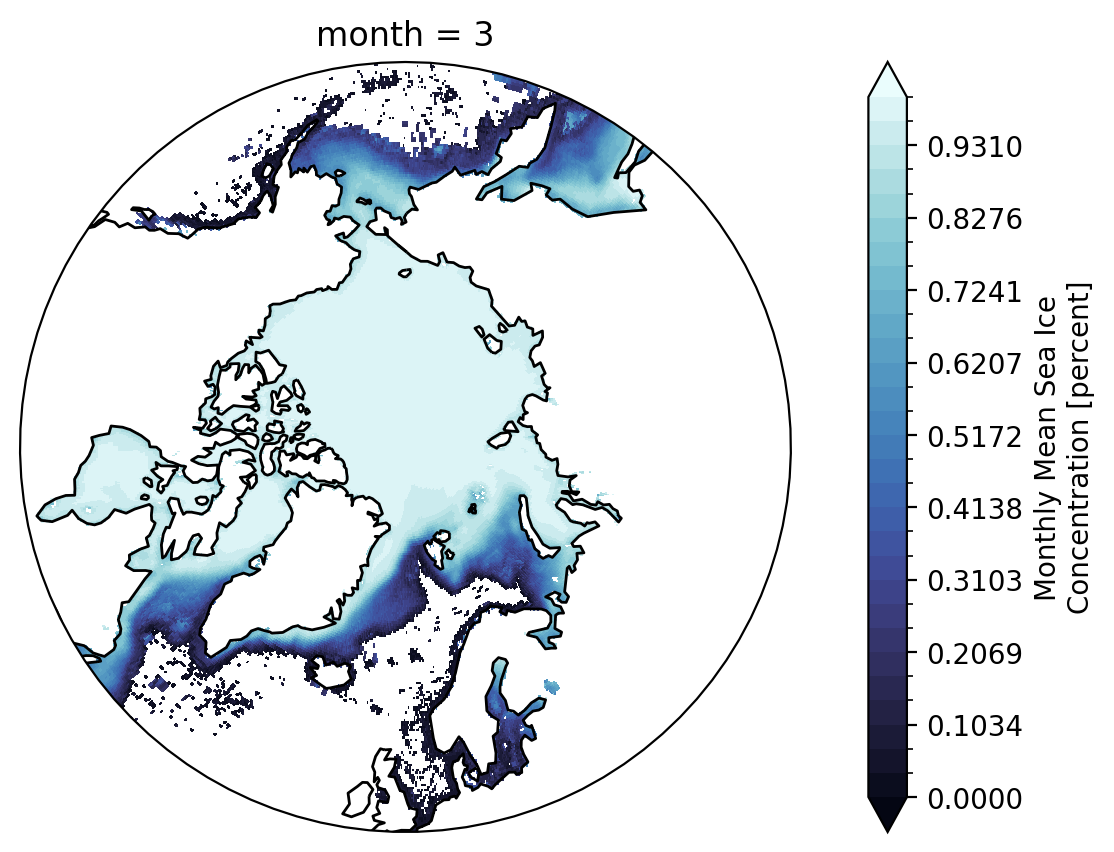

In [186]:
Arctic_min = icec.groupby('time.month').mean(dim='time').sel(month=3)   ##creating the data for the March's 1982-2010 average
North_Polar(Arctic_min,0,1,cmocean.cm.ice) #plotting usign the South pole function created above

**Figure 11:** South Pole projection of the time-averaged (Sept 1981 to Sept 2022) sea ice concentration in the month of March, which is historically the month where SIE is at its minimum. This project is created using the sea ice concentration dataset.

After analyzing the data sets provided and creating several figures to help examine the effects of climate change on SIE, a few things have been made clear. It is evident that SIE changes on a season to season basis, as well as a month to month basis, however in the longrun SIE has been decreasing over the past 30 years.

# Mini Project 2 Questions:

**What is sea ice?**

Sea ice is seawater that freezes and rises to the top and floats on the ocean surface

**What role does sea ice play in our climate system and why should we be
concerned about its rapid decline?**

Sea ice affects the ocean circulation and sea level. If sea ice melts then sea levels will rise and likely drown many coastal cities, and will also cause an increase in drastic weather events. 

**Define the following terms:**

**Sea ice concentration** - total area of sea ice in an location relative to that locations total area

**Sea ice extent** - area of sea ice covering the oceans at any given time

**Sea ice thickness** - thickness of sea ice at any given area.

**How is Antarctic sea ice different from Arctic sea ice and why? Your answer
should discuss its seasonal cycle, thickness, and extent.**

Antarctic sea ice is different from arctic sea ice as arctic sea extent and thickness is shrinking as a whole, while antarctic sea ice has a portion that is still growing. Antarctic SIE also spends more time increasing than arctic does throughout the year.

**Is multi-year ice more common in the Arctic or Antarctic?**

Multi year ice is more common in the arctic as ocean currents move the antarctic ice around enough so that more of it melts each summer.

**What month has experienced the largest change in sea ice extent when comparing
2020 to the 1982 to 2010 average for the Arctic and Antarctic?**

Antarctic: October

Arctic: September

**Describe the term Arctic amplification and the feedback that is believed to be a
key driver of sea ice loss in the Arctic.**

Arctic amplification is defined as the arctic regions warming much faster than that elsewhere in the world. This is happeneing because as sea ice melts, the arctic region's albedo is decreased and is taking in more and more heat energy, which is in turn heating the area faster and melting the ice faster.

**How does the rate of change in SST compare when considering the area-weighted
global average, Arctic average, Antarctic average?**

The rate of change in SST globally is very similar tho that of the arctic average, but both are much higher than the antarctic average. This is likely due to arctic amplification and also the rest of the world (besides antarctica) receiving more direct sunlight.

**Does sea ice melt contribute to global sea level rise? Why or why not?**

Sea ice melt does not contribute to global sea level rise that much because the ice is already in the water as opposed to glacier ice on land, which would heavily contribute to sea level rise if it moves towards the ocean.
